# Examen Parcial 2


### About Dataset
Machine Predictive Maintenance Classification Dataset
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
- 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

### Important : 
There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
- Target : Failure or Not
- Failure Type : Type of Failure


> **Nota importante:** Para este examen vamos a utilizar la variable objetivo, **Target** es binaria si la maquina fallo o no, la otra variable hay que eliminarla ya que puede causar data leakage

> **Pregunta 1:** Investigar y explicar en un parrafo en formato markdown que es el **data leakage** y como esta puede afectar a nuestro modelo de ML, especificamente en este caso porque hay que eliminar una de las variables objetivo

El data leakage es un problema crítico en el desarrollo de modelos de machine learning que ocurre cuando información del conjunto de prueba o de futuras observaciones se incorpora, directa o indirectamente, en la fase de entrenamiento. Esto genera un sesgo optimista en el desempeño del modelo, ya que este aprende patrones que no estarán disponibles en un entorno real, llevando a sobreestimaciones de su precisión y a fallos en producción. Cuando una variable relacionada con el target se incluye en los datos de entrenamiento, el modelo puede aprovecharla como un atajo artificial en lugar de aprender relaciones causales o correlacionales genuinas entre las características y la variable objetivo. En el caso de un problema de clasificación binaria como el descrito, donde Target indica si una máquina falló o no, la presencia de otra variable asociada puede introducir información futura o redundante.

## Carga de datos

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [180]:
data = pd.read_csv("predictive_maintenance.csv")

In [181]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


## Preprocesamiento de datos

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### Validacion de datos Null o dupicados

In [183]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [184]:
data.duplicated().sum()

np.int64(0)

### Entendiendo los tipos de datos y valores unicos

In [185]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [186]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [187]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

> **Pregunta 2:** Que entiendes de el analisis anterior

El dataset contiene 10,000 registros (filas) según se muestra en data.nunique() y tiene 11 columnas (variables) como se observa en data.dtypes.
Los enteros son los int64 y los decimales los float64. También hay variables categóricas object como Product ID, Type y Failure Type. 
No hay valores nulos, data.isnull().sum() muestra 0 para todas las columnas.
No hay registros duplicados data.duplicated().sum() es 0.

La variable type categórica con 3 valores únicos: L, M, H; L: 6000 registros; M: 2997 registros; H: 1083 registros. Está desbalanceada con predominio de categoría L. También que el dataset parece estar limpio y listo para análisis/modelado.

### Eliminar identificadores
Elimina las variables
- UDI
- Product ID
- Failure Type


Tip: utiliza la función `drop`de pandas

In [188]:
data.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


### Verificamos si el dataset esta balancado

Tip: Utiliza la funcion de pandas `value_counts()` 

In [189]:
target_counts = data['Target'].value_counts(normalize=True) * 100
print("Distribución de la variable Target (%):")
print(target_counts)

Distribución de la variable Target (%):
Target
0    96.61
1     3.39
Name: proportion, dtype: float64


In [190]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [191]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

> **Pregunta 3:** Esta balanceado o no el dataset, que estrategias hay para un dataset no balanceado

No, el dataset está severamente desbalanceado según la distribución mostrada, porque Clase (0) con 96.61% de los registros y Clase (1) solo con 3.39% de los registros. Este es un caso de desbalance donde una clase domina ampliamente sobre la otra. 

Una estrategia son las técnicas de remuestreo:
Está el submuestreo (Undersampling) que trata de reducir la clase mayoritaria, aunque puede haber pérdida de información valiosa. Por otro lado está sobremuestreo (Oversampling), que aumenta la clase minoritaria aunque puede haber posible sobreajuste. 

También hay métodos algoríticos donde se asigna mayor peso a la clase minoritaria o algunos especializados como BalancedRandomForest o EasyEnsemble.

### Creamos dos variables nuevas
- temperature_difference: diferencia entre la temperatura de el aire y la del proceso
- Mechanical Power (W):

$$
P = \frac{T \cdot 2\pi \cdot N}{60}
$$
Donde:

- $P$ es la potencia en W,
- $T$ es el torque en Nm,
- $N$ es la velocidad en rpm,
- $\frac{2\pi}{60}$ convierte rpm a rad/s.

Aplicandolo a la data:
$$
\text{Potencia (W)} = \frac{\text{Torque (Nm)} \cdot \text{Velocidad (rpm)} \cdot 2 \cdot \pi}{60.4}
$$

In [192]:
data['temperature_difference'] = data['Process temperature [K]'] - data['Air temperature [K]']

In [193]:
data['Mechanical Power (W)'] = (data['Torque [Nm]'] * data['Rotational speed [rpm]'] * 2 * np.pi) / 60.4

## Analisis de Datos Exploratorio

#### Visualización de Tipos de maquina
Grafica la distribución de tipos de maquina

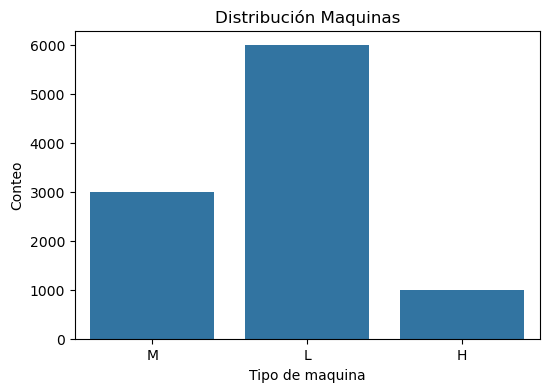

In [194]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=data)
plt.title('Distribución Maquinas')
plt.xlabel('Tipo de maquina')
plt.ylabel('Conteo')
plt.show()

#### Visualización de la distribución de fallos entre tipos de productos

Muestra cómo se distribuyen los fallos entre los tipos: ¿es posible que algunos tipos de maquina fallan más?

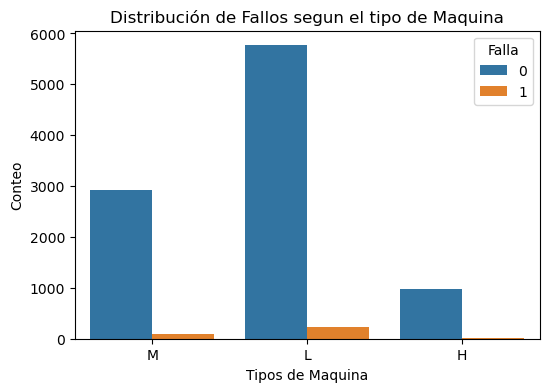

In [195]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', hue='Target', data=data)
plt.title('Distribución de Fallos segun el tipo de Maquina')
plt.xlabel('Tipos de Maquina')
plt.ylabel('Conteo')
plt.legend(title='Falla')
plt.show()

### Grafico de distribuciones 
Graficamos las distribuciones de las variables numericas para observar anomalias y patrones en los datos.



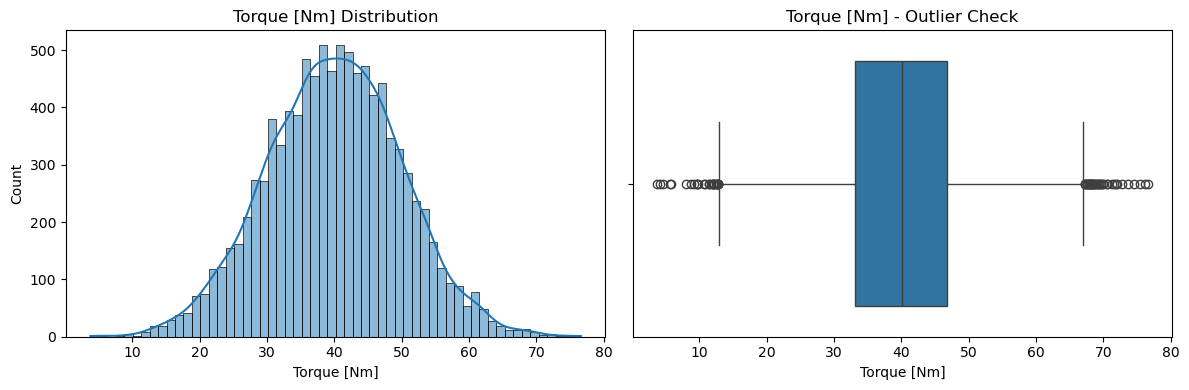

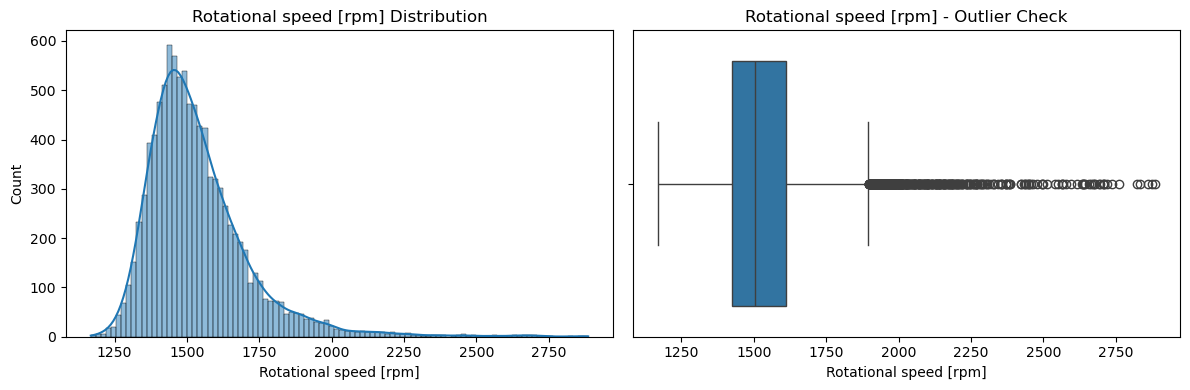

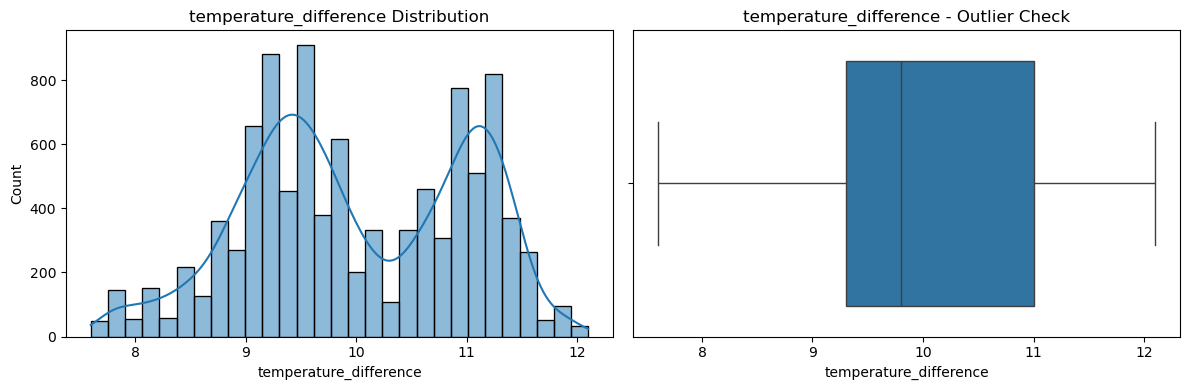

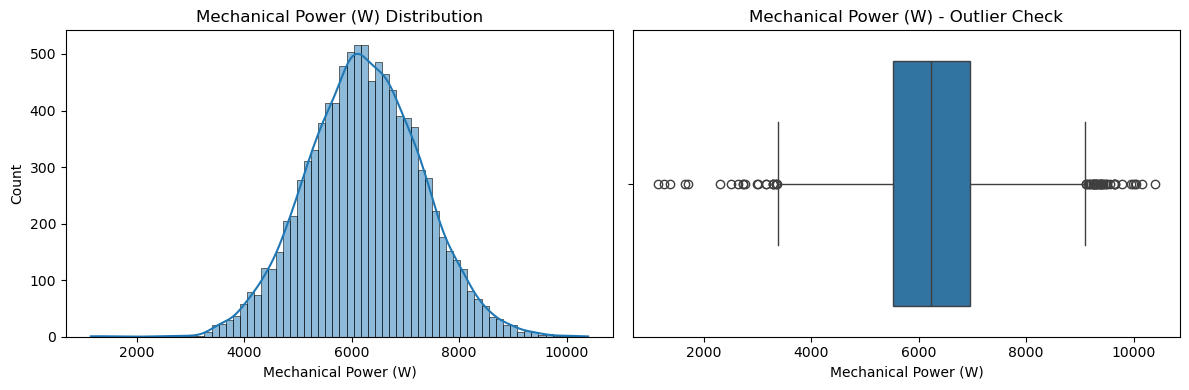

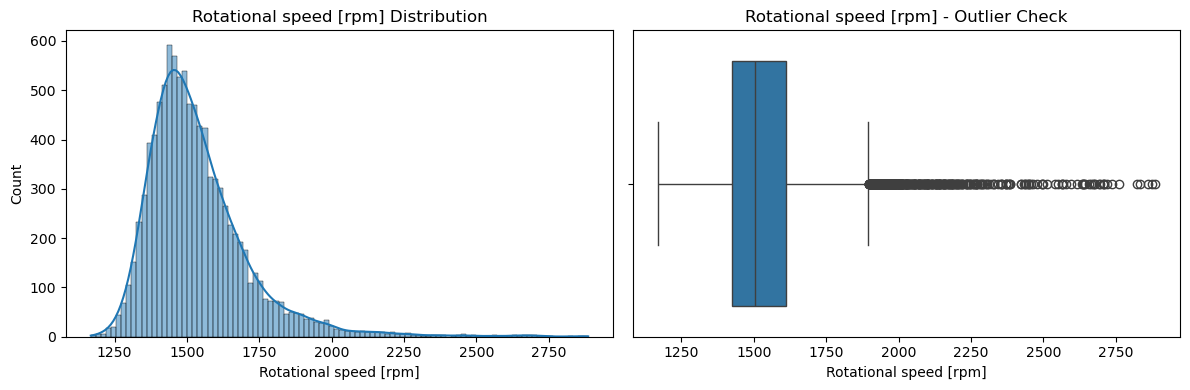

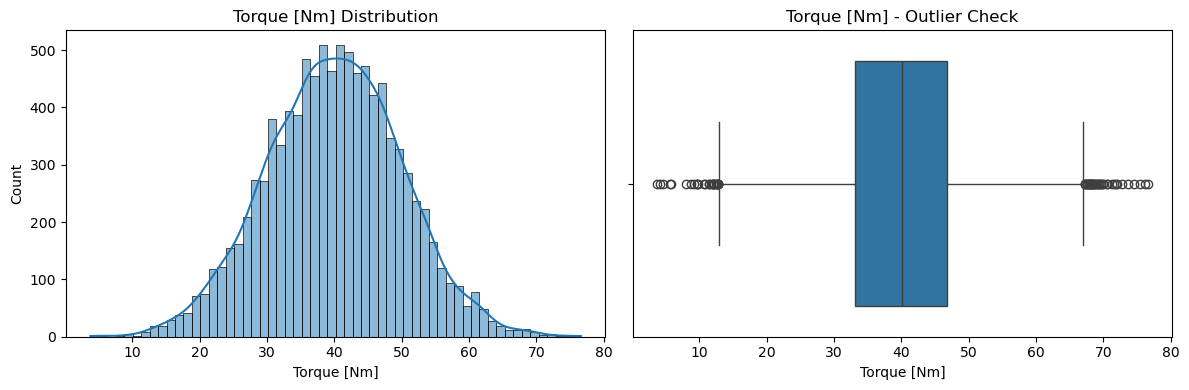

In [196]:
cols = [
    'Torque [Nm]', 'Rotational speed [rpm]', 
    'temperature_difference', 'Mechanical Power (W)',
    'Rotational speed [rpm]', 'Torque [Nm]'
]

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(data=data, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    # Boxplot
    sns.boxplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

    plt.tight_layout()
    plt.show()

> **Pregunta 4:** Describe que entiendes de la grafica anterior

Distribución de Torque (Nm):
La mayoría de los valores se concentran entre aproximadamente 10-60 Nm con istribución relativamente simétrica con un pico alrededor de 30-40 Nm. Se observan valores atípicos por encima de 60 Nm (hasta ~80 Nm) que podrían representar errores de medición.

Distribución de Velocidad Rotacional (rpm):
Datos concentrados entre 1500-2500 rpm con distribución aproximadamente normal con pico alrededor de 2000 rpm. Valores atípicos visibles por debajo de 1500 rpm y por encima de 2500 rpm y el outlier más extremo parece estar alrededor de 1250 rpm.

Distribución de temperature_difference:
Los valores se concentran entre -12 y -8 K (Kelvin) con distribución relativamente uniforme en este rango. No se observan valores claramente atípicos en el rango mostrado por lo que todos los valores parecen estar dentro de un rango coherente.

Distribución de Mechanical Power (W):
Valores distribuidos entre 2,000 W y 10,000 W con mayor concentración en el rango medio (4,000-8,000 W). Valores cercanos a 10,000 W podrían ser atípicos dependiendo del contexto, pero no hay valores extremos claramente visibles fuera del rango mostrado.

### Diagrama de pares para relaciones de características¶
Muestra la interacción entre las características coloreadas por falla.

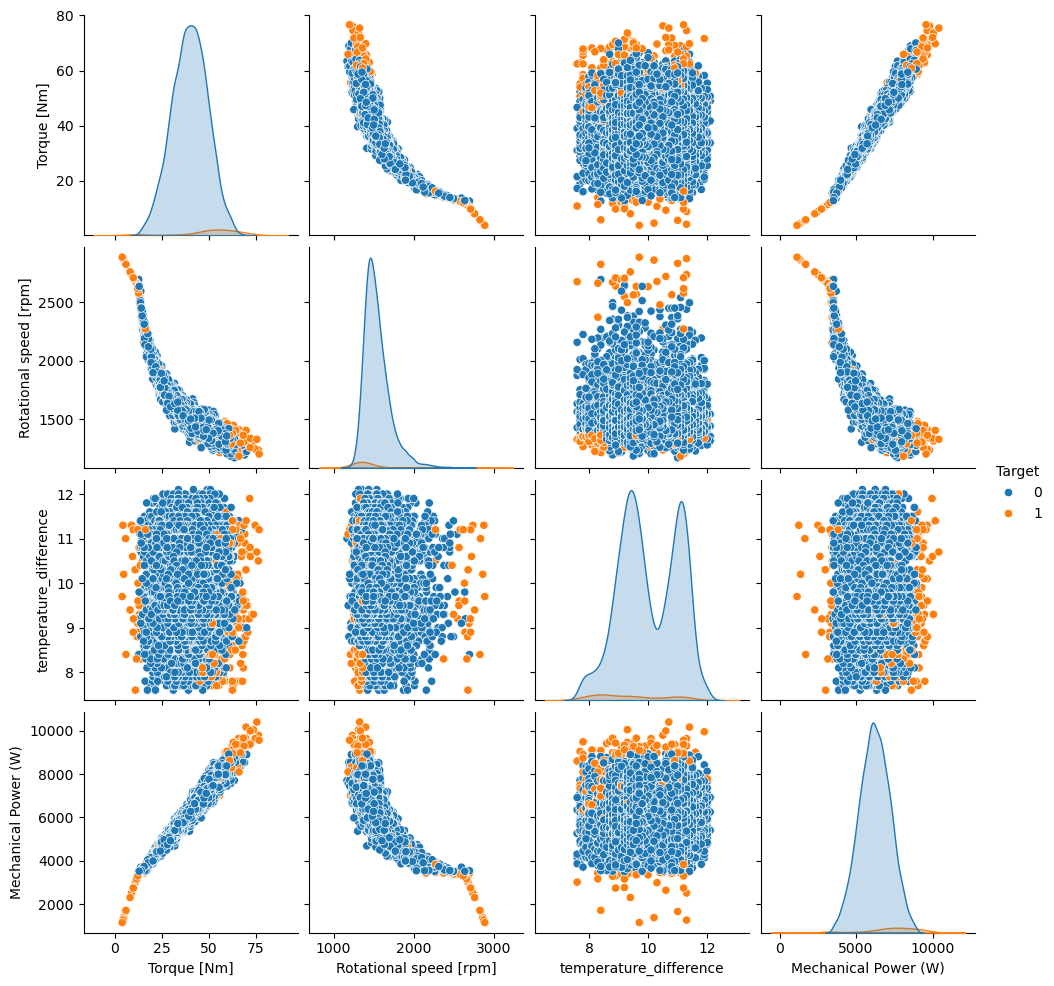

In [197]:
sns.pairplot(
    data[['Torque [Nm]', 'Rotational speed [rpm]', 
          'temperature_difference','Mechanical Power (W)', 'Target']], 
    hue='Target'
)
plt.show()

### Correlacion entre variables numericas

<Axes: >

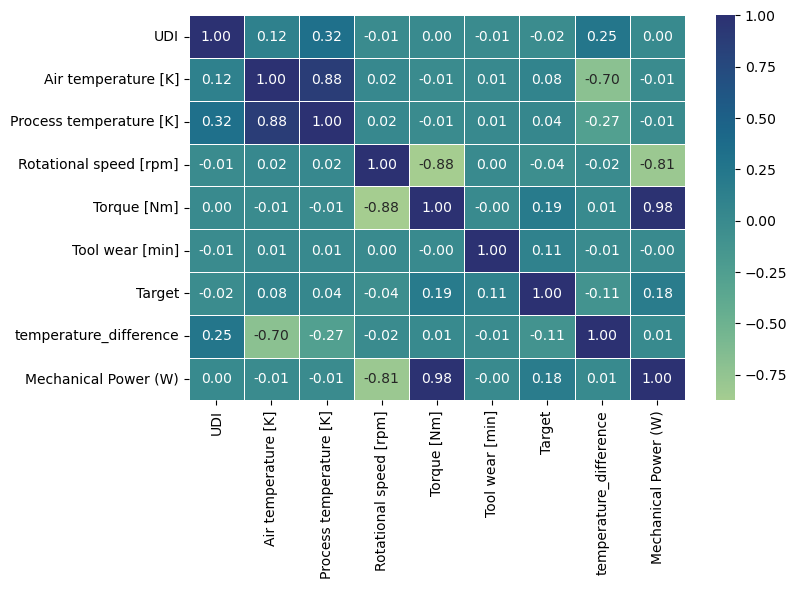

In [198]:
corr_matrix=data.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='crest',fmt=".2f", linewidths=0.5)

> **Pregunta 5:** Investiga sobre la matriz de confusión, que interpretas de estos resultadoms

Una matriz de confusión es una herramienta para evaluar el rendimiento de un modelo de clasificación que muestra:

- VP (Verdaderos Positivos): Casos correctamente identificados como fallos

- FN (Falsos Negativos): Fallos no detectados (error peligroso)

- FP (Falsos Positivos): Falsas alarmas (costoso pero menos crítico)

- VN (Verdaderos Negativos): Correctamente identificados como normales

Interpretación de la Matriz de Correlación Presentada

Relaciones físicas esperadas:

- Temperaturas (0.88): Alta correlación entre aire y proceso, como es normal en sistemas térmicos

- Torque-Velocidad (-0.88): Relación inversa típica en motores porque a mayor velocidad, menor torque

- Torque-Potencia (0.98): Relación casi perfecta, ya que la potencia se calcula a partir del torque

 Variables predictivas de fallos (Target):

- Diferencia de temperatura (-0.70): La correlación negativa más fuerte sugiere que mayores diferencias predicen fallos

- Torque (0.19) y Potencia (0.18): Relaciones positivas débiles

- Desgaste de herramienta (0.11): Mínima correlación

Variables no informativas:

- El desgaste de herramientas muestra correlación cercana a cero con casi todo

- Las temperaturas individuales no correlacionan con el Target

Problemas Detectados
 Multicolinealidad:

- Torque y Potencia son casi redundantes (0.98)

- Temperaturas individuales vs. su diferencia

Variables candidatas para eliminar:

- Process temperature (por tener alta correlación con air temperature)

- Mechanical Power (por ser derivada de torque y velocidad)

# Entrenando el Modelo

### Separando el dataset

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X = data.drop(columns=["Target"]).copy()
y = data["Target"]

>  Utiliza la función `train_test_split` de sklearn utiliza 20% de los datos para el test set

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,  
    stratify=y 
)

## Codificación de variables categoricas

In [202]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [203]:
categorical_cols = ['Type']
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [204]:
# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Crear pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicar al dataframe
X_train_transformed = pipeline.fit_transform(X_train)

In [205]:
X_test_transformed = pipeline.transform(X_test)

#### Modelos de ML

In [206]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix


In [207]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression CV': LogisticRegressionCV(),
    'SGD': SGDClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}

In [208]:
def evaluate_model(X_train, X_test, Y_train, Y_test):
    result = []

    for name, model in models.items():
        print(f"======== Training model: {name} ============")
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)

        # Handle predict_proba or decision_function for ROC AUC
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            y_score = y_pred  # fallback (not ideal)

        roc_auc = roc_auc_score(Y_test, y_score)
        metrics = {
            'precision': precision_score(Y_test, y_pred, zero_division=0),
            'recall': recall_score(Y_test, y_pred, zero_division=0),
            'f1': f1_score(Y_test, y_pred, zero_division=0),
            'roc_auc': roc_auc,
            'cm' : confusion_matrix(Y_test, y_pred)
        }
        print(f"Test data ROC AUC: {roc_auc:.2f}")
        result.append((name, metrics))

    # Sort by F1 score as an example (you can change this to any other metric)
    result.sort(key=lambda x: x[1]['f1'], reverse=True)
    return result

In [209]:
results = evaluate_model(X_train_transformed,X_test_transformed,y_train,y_test)

======== Training model: Logistic Regression ============
Test data ROC AUC: 0.90
======== Training model: Logistic Regression CV ============
Test data ROC AUC: 0.90
======== Training model: SGD ============
Test data ROC AUC: 0.83
======== Training model: Random Forest ============
Test data ROC AUC: 0.96
======== Training model: Gradient Boosting ============
Test data ROC AUC: 0.97
======== Training model: Decision Tree ============
Test data ROC AUC: 0.87


In [210]:
print("Model Performance:")
for name, metrics in results:
    print(f"======== Model: {name} ============")
    print(f"  Precision: {metrics['precision']:.6f}")
    print(f"  Recall:    {metrics['recall']:.6f}")
    print(f"  F1 Score:  {metrics['f1']:.6f}")
    print(f"  ROC AUC:   {metrics['roc_auc']:.6f}")

Model Performance:
======== Model: Gradient Boosting ============
  Precision: 0.865385
  Recall:    0.661765
  F1 Score:  0.750000
  ROC AUC:   0.968404
======== Model: Random Forest ============
  Precision: 0.857143
  Recall:    0.617647
  F1 Score:  0.717949
  ROC AUC:   0.955605
======== Model: Decision Tree ============
  Precision: 0.662338
  Recall:    0.750000
  F1 Score:  0.703448
  ROC AUC:   0.868271
======== Model: Logistic Regression CV ============
  Precision: 0.727273
  Recall:    0.117647
  F1 Score:  0.202532
  ROC AUC:   0.899746
======== Model: Logistic Regression ============
  Precision: 0.666667
  Recall:    0.117647
  F1 Score:  0.200000
  ROC AUC:   0.900454
======== Model: SGD ============
  Precision: 0.625000
  Recall:    0.073529
  F1 Score:  0.131579
  ROC AUC:   0.825470


>  **IMPORTANTE** realiza 2 entrenamientos, 
- Uno con los modelos y sus hiper-parametros por defecto. Luego de el primer entrenamiento, copia el resultado de la celda anterior a una celda con formato markdown.
- Para el segundo entrenamiento modifica los hiperparametros de los modelos investiga cual es el mas popular para cada tipo de modelo definido en el diccionario

¿Mejoro algo al ajustar hiperparametros?


*Tip: utiliza el hiper-parametro* `class_weight='balanced'`

Model Performance:

====== Model: Gradient Boosting ==========
  Precision: 0.865385
  Recall:    0.661765
  F1 Score:  0.750000
  ROC AUC:   0.968404
  
====== Model: Random Forest ==========
  Precision: 0.857143
  Recall:    0.617647
  F1 Score:  0.717949
  ROC AUC:   0.955605
  
====== Model: Decision Tree ==========
  Precision: 0.662338
  Recall:    0.750000
  F1 Score:  0.703448
  ROC AUC:   0.868271
  
====== Model: Logistic Regression CV ==========
  Precision: 0.727273
  Recall:    0.117647
  F1 Score:  0.202532
  ROC AUC:   0.899746
  
====== Model: Logistic Regression ==========
  Precision: 0.666667
  Recall:    0.117647
  F1 Score:  0.200000
  ROC AUC:   0.900454
  
====== Model: SGD ==========
  Precision: 0.625000
  Recall:    0.073529
  F1 Score:  0.131579
  ROC AUC:   0.825470

In [211]:
models_tuned = {
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=150, learning_rate=0.05, max_depth=4, min_samples_split=10, random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=150, max_depth=12, min_samples_split=5, class_weight='balanced', random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=6, min_samples_leaf=8, class_weight='balanced', random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        solver='liblinear', penalty='l1', C=0.1, class_weight='balanced', max_iter=1000, random_state=42
    ),
    'Logistic Regression CV': LogisticRegressionCV(
        solver='liblinear', cv=5, penalty='l1', Cs=[0.1, 1, 10], class_weight='balanced', max_iter=1000, random_state=42
    ),
    'SGD': SGDClassifier(
        loss='log_loss', alpha=0.0001, max_iter=1000, class_weight='balanced', early_stopping=True, random_state=42
    )
}

In [212]:
results_tuned = evaluate_model(X_train_transformed, X_test_transformed, y_train, y_test)

======== Training model: Logistic Regression ============
Test data ROC AUC: 0.90
======== Training model: Logistic Regression CV ============
Test data ROC AUC: 0.90
======== Training model: SGD ============
Test data ROC AUC: 0.89
======== Training model: Random Forest ============
Test data ROC AUC: 0.96
======== Training model: Gradient Boosting ============
Test data ROC AUC: 0.97
======== Training model: Decision Tree ============
Test data ROC AUC: 0.86


In [213]:
print("Resultados con Hiperparámetros Ajustados")
for name, metrics in results_tuned:
    print(f"======== Model: {name} ============")
    print(f"  Precision: {metrics['precision']:.6f}")
    print(f"  Recall:    {metrics['recall']:.6f}")
    print(f"  F1 Score:  {metrics['f1']:.6f}")
    print(f"  ROC AUC:   {metrics['roc_auc']:.6f}")

Resultados con Hiperparámetros Ajustados
======== Model: Gradient Boosting ============
  Precision: 0.865385
  Recall:    0.661765
  F1 Score:  0.750000
  ROC AUC:   0.968449
======== Model: Random Forest ============
  Precision: 0.875000
  Recall:    0.617647
  F1 Score:  0.724138
  ROC AUC:   0.963707
======== Model: Decision Tree ============
  Precision: 0.666667
  Recall:    0.735294
  F1 Score:  0.699301
  ROC AUC:   0.861177
======== Model: Logistic Regression CV ============
  Precision: 0.727273
  Recall:    0.117647
  F1 Score:  0.202532
  ROC AUC:   0.899746
======== Model: Logistic Regression ============
  Precision: 0.666667
  Recall:    0.117647
  F1 Score:  0.200000
  ROC AUC:   0.900454
======== Model: SGD ============
  Precision: 1.000000
  Recall:    0.014706
  F1 Score:  0.028986
  ROC AUC:   0.886631


Model Performance:

====== Model: Gradient Boosting ==========
  Precision: 0.865385
  Recall:    0.661765
  F1 Score:  0.750000
  ROC AUC:   0.968404
  
====== Model: Random Forest ==========
  Precision: 0.857143
  Recall:    0.617647
  F1 Score:  0.717949
  ROC AUC:   0.955605
  
====== Model: Decision Tree ==========
  Precision: 0.662338
  Recall:    0.750000
  F1 Score:  0.703448
  ROC AUC:   0.868271
  
====== Model: Logistic Regression CV ==========
  Precision: 0.727273
  Recall:    0.117647
  F1 Score:  0.202532
  ROC AUC:   0.899746
  
====== Model: Logistic Regression ==========
  Precision: 0.666667
  Recall:    0.117647
  F1 Score:  0.200000
  ROC AUC:   0.900454
  
====== Model: SGD ==========
  Precision: 0.625000
  Recall:    0.073529
  F1 Score:  0.131579
  ROC AUC:   0.825470


Resultados con Hiperparámetros Ajustados

====== Model: Gradient Boosting ==========
  Precision: 0.865385
  Recall:    0.661765
  F1 Score:  0.750000
  ROC AUC:   0.968449
  
====== Model: Random Forest ==========
  Precision: 0.875000
  Recall:    0.617647
  F1 Score:  0.724138
  ROC AUC:   0.963707
  
====== Model: Decision Tree ==========
  Precision: 0.666667
  Recall:    0.735294
  F1 Score:  0.699301
  ROC AUC:   0.861177
  
====== Model: Logistic Regression CV ==========
  Precision: 0.727273
  Recall:    0.117647
  F1 Score:  0.202532
  ROC AUC:   0.899746
  
====== Model: Logistic Regression ==========
  Precision: 0.666667
  Recall:    0.117647
  F1 Score:  0.200000
  ROC AUC:   0.900454
  
====== Model: SGD ==========
  Precision: 1.000000
  Recall:    0.014706
  F1 Score:  0.028986
  ROC AUC:   0.886631

Observaciones en cada modelo:
- Gradient Boosting: el único cambio a mejor que hay fue en ROC AUC, pero fue mínimo.
- Decision Tree: en este mejoró la precisión, pero score, recall y ROC AUC empeoraron, todos de forma mínima.
- Random Forest: aquí precision y recall mejoraron, aunque score y ROC AUC no lo hicieron.
- Logistic Regression CV: en este caso se mantuvo estable, con cambios mínimos.
- Logistic Regression: igual que el caso anterior, no hubieron cambios.
- SGP: aquí si hubieron mejores notorias en precision, los demás no presentaron muchos cambios.

 Concluyo que dependiendo de los hiperparámetros pueden mejorar o empeorar los resultados, incluso ambas a la vez.

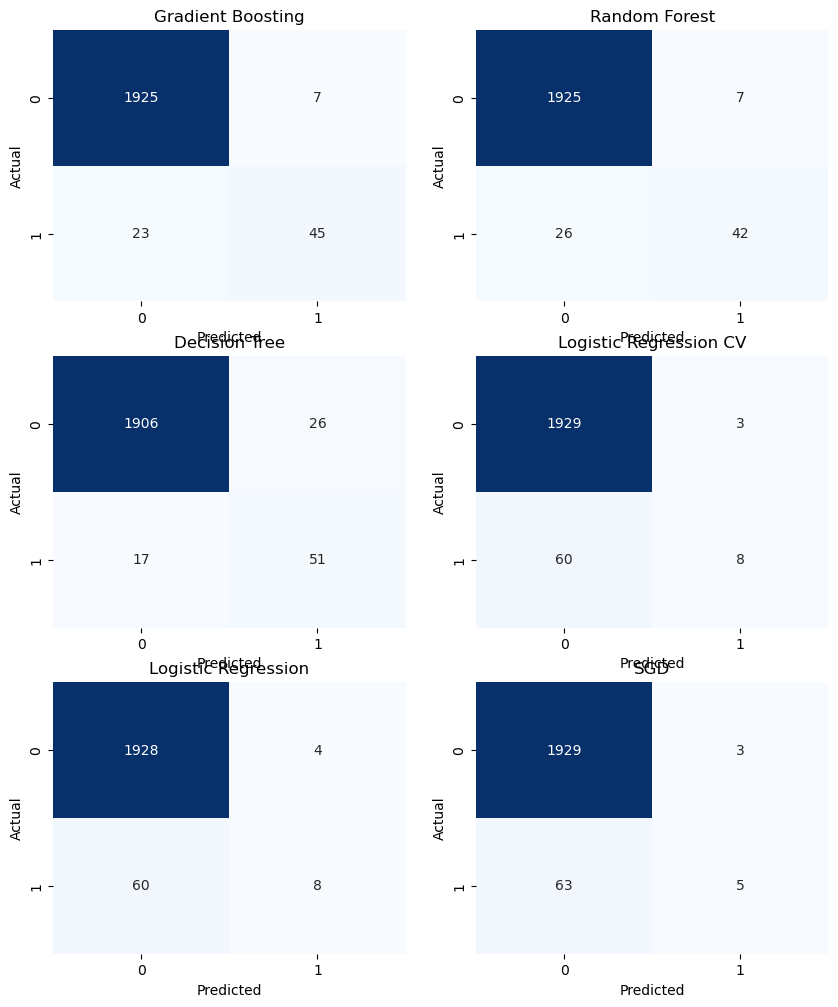

In [214]:
 # Plot all confusion matrices as subplots
n_models = len(metrics)
cols = 2  # You can change this based on your preference
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten in case of 2D array

for idx, (name, metrics) in enumerate(results):
    cm=metrics["cm"]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

> **Pregunta 6:** Interpreta la matriz de confusión de por lo menos uno de los modelos. ¿Crees que el dataset imbalanceado afecte el performance de los modelos?

Del modelo Decision Tree:
- Verdaderos Negativos (TN = 1906): El modelo predijo correctamente 1906 casos como clase negativa (0).
- Falsos Positivos (FP = 26): Predijo incorrectamente 26 casos negativos como positivos (1).
- Falsos Negativos (FN = 23): No logró detectar 23 casos positivos reales (los clasificó como negativos).
- Verdaderos Positivos (TP = 45): Acertó en 40 casos positivos.

El desbalance del dataset sí está afectando el rendimiento de los modelos, porque hay dominio de la clase mayoritaria (0) y la clase minoritaria (1) es ignorada, se puede ver en los números del gráfico. Afecta porque el modelo aprende a predecir siempre la clase mayoritaria para minimizar errores pero sacrifica la detección de la clase minoritaria.

### Balanceo de datos

Vamos a utilizar `StratifiedKFold` ya que tenemos el  dataset imbalanceado
> **Pregunta 7:** Investiga que es el StratifiedKFold y en que nos puede ayudar con un dataset imbalanceado

StratifiedKFold es una técnica de validación cruzada que mantiene la proporción de clases en cada división. A diferencia de KFold estándar, que divide los datos aleatoriamente, StratifiedKFold asegura que cada fold tenga el mismo porcentaje de muestras de cada clase. Esto es de ayuda porque evita folds sin clases minoritarias, garantiza que la clase rara aparezca en todos los folds. Además al evaluar en folds estratificados, las métricas (precision, recall) reflejan mejor el rendimiento real y el modelo no se sesga por folds dominados por la clase mayoritaria.

In [215]:
from sklearn.model_selection import StratifiedKFold

In [216]:
def evaluate_model_cv(X, y, pipeline, models, n_splits=5):
    result = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"======== Evaluating model: {name} with {n_splits}-Fold Stratified CV ============")
        
        fold_metrics = {'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
        confusion_matrices = []

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            Y_train, Y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            X_train = pipeline.transform(X_train)
            X_test = pipeline.transform(X_test)
            
            model.fit(X_train, Y_train)
            y_pred = model.predict(X_test)

            # ROC AUC input
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)[:, 1]
            elif hasattr(model, "decision_function"):
                y_score = model.decision_function(X_test)
            else:
                y_score = y_pred

            # Collect metrics
            fold_metrics['precision'].append(precision_score(Y_test, y_pred, zero_division=0))
            fold_metrics['recall'].append(recall_score(Y_test, y_pred, zero_division=0))
            fold_metrics['f1'].append(f1_score(Y_test, y_pred, zero_division=0))
            fold_metrics['roc_auc'].append(roc_auc_score(Y_test, y_score))
            confusion_matrices.append(confusion_matrix(Y_test, y_pred))

            print(f"  Fold {fold} - F1: {fold_metrics['f1'][-1]:.2f}, AUC: {fold_metrics['roc_auc'][-1]:.2f}")

        # Aggregate average metrics
        avg_metrics = {
            'precision': np.mean(fold_metrics['precision']),
            'recall': np.mean(fold_metrics['recall']),
            'f1': np.mean(fold_metrics['f1']),
            'roc_auc': np.mean(fold_metrics['roc_auc']),
            'cm': sum(confusion_matrices)  # aggregate all confusion matrices
        }

        result.append((name, avg_metrics))

    # Sort models by F1
    result.sort(key=lambda x: x[1]['f1'], reverse=True)
    return result

In [217]:
results = evaluate_model_cv(X, y, pipeline, models)

======== Evaluating model: Logistic Regression with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.27, AUC: 0.89
  Fold 2 - F1: 0.26, AUC: 0.89
  Fold 3 - F1: 0.26, AUC: 0.91
  Fold 4 - F1: 0.42, AUC: 0.91
  Fold 5 - F1: 0.31, AUC: 0.88
======== Evaluating model: Logistic Regression CV with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.09, AUC: 0.89
  Fold 2 - F1: 0.19, AUC: 0.88
  Fold 3 - F1: 0.19, AUC: 0.91
  Fold 4 - F1: 0.21, AUC: 0.91
  Fold 5 - F1: 0.19, AUC: 0.88
======== Evaluating model: SGD with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.16, AUC: 0.88
  Fold 2 - F1: 0.35, AUC: 0.81
  Fold 3 - F1: 0.18, AUC: 0.90
  Fold 4 - F1: 0.06, AUC: 0.89
  Fold 5 - F1: 0.03, AUC: 0.88
======== Evaluating model: Random Forest with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.74, AUC: 0.98
  Fold 2 - F1: 0.77, AUC: 0.95
  Fold 3 - F1: 0.65, AUC: 0.97
  Fold 4 - F1: 0.75, AUC: 0.95
  Fold 5 - F1: 0.69, AUC: 0.95
======== Evaluating model: Gradient Boosting with 5-Fol

In [218]:
print("Model Performance:")
for name, metrics in results:
    print(f"======== Model: {name} ============")
    print(f"  Precision: {metrics['precision']:.6f}")
    print(f"  Recall:    {metrics['recall']:.6f}")
    print(f"  F1 Score:  {metrics['f1']:.6f}")
    print(f"  ROC AUC:   {metrics['roc_auc']:.6f}")

Model Performance:
======== Model: Gradient Boosting ============
  Precision: 0.855497
  Recall:    0.631387
  F1 Score:  0.721563
  ROC AUC:   0.970494
======== Model: Random Forest ============
  Precision: 0.887679
  Recall:    0.607770
  F1 Score:  0.718872
  ROC AUC:   0.960866
======== Model: Decision Tree ============
  Precision: 0.641854
  Recall:    0.654960
  F1 Score:  0.647180
  ROC AUC:   0.821011
======== Model: Logistic Regression ============
  Precision: 0.742791
  Recall:    0.194601
  F1 Score:  0.305198
  ROC AUC:   0.895334
======== Model: Logistic Regression CV ============
  Precision: 1.000000
  Recall:    0.094249
  F1 Score:  0.171248
  ROC AUC:   0.893816
======== Model: SGD ============
  Precision: 0.846429
  Recall:    0.100263
  F1 Score:  0.155731
  ROC AUC:   0.872581


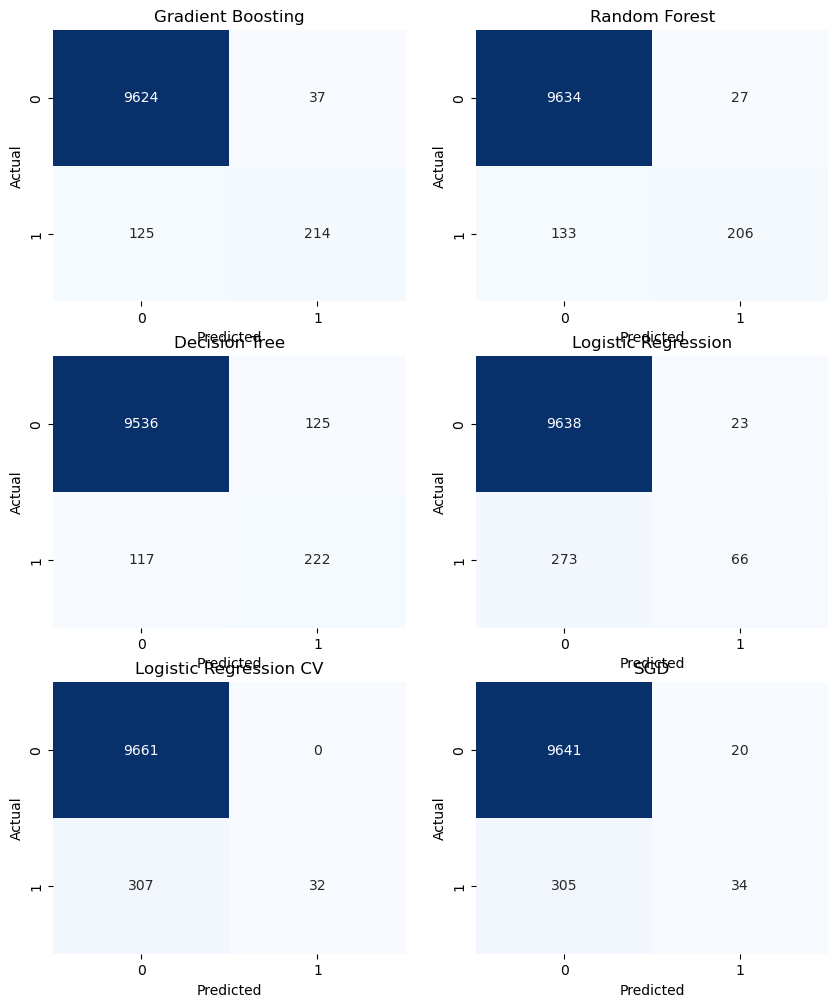

In [219]:
 # Plot all confusion matrices as subplots
n_models = len(metrics)
cols = 2  # You can change this based on your preference
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten in case of 2D array

for idx, (name, metrics) in enumerate(results):
    cm=metrics["cm"]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

> **Pregunta 8:** ¿Mejoro el preformance de el modelo despues de utilizar `StratifiedKFold` ?

En comparación con el Anterior Análisis (para el modelo Decision Tree), la precisión para la clase mayoritaria (0) sigue siendo excelente porque tiene TN altísimo y un FP bajo. Para la clase minoritaria (1) aún hay margen de mejora porque son 117 FN, casos positivos reales que marcó como negativos.

StraitifiedKFold garantizó que la clase minoritaria estuviera representada en todos los folds, evitando métricas infladas artificialmente, aunque como tal no aumenta el rendimiento por sí solo, pero permite evaluarlo de manera realista. Mejoró la evaluación del modelo, pero no corrige el desbalance.